In [1]:
import os
from dotenv import load_dotenv
import requests
# .env file to environment
load_dotenv()
#load_dotenv(verbose=True)
# 구글 API 키
google_api_key = os.getenv('GOOGLE_API_KEY')


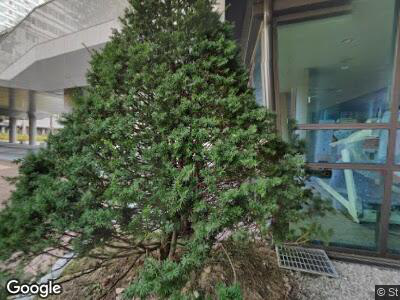

In [4]:
from PIL import Image
import io

# 위도, 경도
lat, lon =  37.715133, 126.734086   #48.857864549450355, 2.2951934711297723

# 관측 시야(Field Of View) - 최대 120 기본값 90
fov = "90"
# 방향 - 범위 0 ~ 360 (0 or 360::북, 180: 남)
heading = "0"#-45"
# 카메라 상하 방향 설정 - 범위 -90 ~ 90 기본값 0
pitch = "0"# "30"

# URL
url = f"https://maps.googleapis.com/maps/api/streetview?size=400x300&location={lat},{lon}&fov={fov}&heading={heading}&pitch={pitch}&key={google_api_key}"

payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

# 이미지 바이트 데이터
bytes_data = response.content

# 이미지 변환
img = Image.open(io.BytesIO(bytes_data))
img

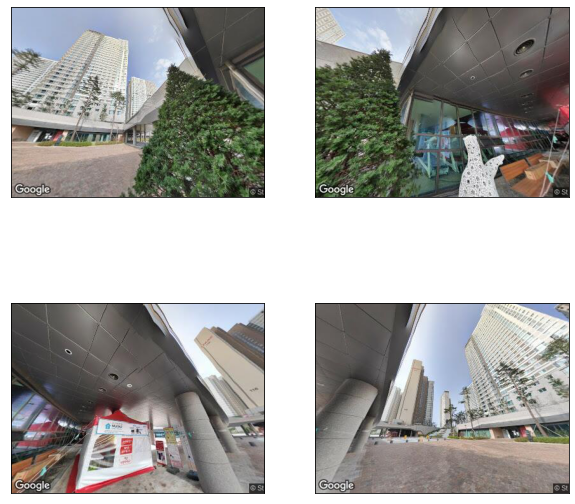

In [36]:
heading_list = list(range(-45, 360-45, 90))
img_list = []
for heading in heading_list:
    lat, lon = 37.715133, 126.734086 #48.857864549450355, 2.2951934711297723
    fov = "120"
    pitch = "30"
 
    url = f"https://maps.googleapis.com/maps/api/streetview?size=400x300&location={lat},{lon}&fov={fov}&heading={heading}&pitch={pitch}&key={google_api_key}"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    bytes_data = response.content
    img = Image.open(io.BytesIO(bytes_data))
    img_list.append(img)
    
import matplotlib.pyplot as plt
%matplotlib inline

rows = 2
columns = 2


plt.figure(figsize=(10, 10))
for i in range(4):
    i += 1
    plt.subplot(rows, columns, i)
    plt.imshow(img_list[i-1])
    plt.xticks([])
    plt.yticks([])
    
plt.show()